## Object - A case study and Forecasting of AQI INDIA
### Submitted by Yashwant Kumar Aaditya
#### GitHub -  https://github.com/yashwantaditya009
#### LinkedIn - https://www.linkedin.com/in/yashwant-kumar-aditya-4753151b5/

In [1]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
citydailydata = pd.read_csv('city_day.csv')

# 1. Exploring the data

In [3]:
def getArray(csvfile):
    city_daily_data = np.empty((0,16))
    for row in dailydata:
        city_daily_data = np.vstack((city_daily_data, np.array(row)))
    return city_daily_data

In [4]:
def getCities(data):
    cities = data['City'].value_counts().to_frame()
    print('------------------------------------------------------------------------------')
    print('CITIES COVERED IN THE DATA:')
    print('------------------------------------------------------------------------------')
    print('Total number of cities in the dataset :', len(cities))
    cities = cities.sort_index().index
    for i in cities:
        print(i)
#     print('------------------------------------------------------------------------------')

In [5]:
def getDurationOfData(data):
    print('------------------------------------------------------------------------------')
    print('DURATION OF DATA:\n------------------------------------------------------------------------------\nThe data is between', data['Date'].min(), 'and' , data['Date'].max())
#     print('------------------------------------------------------------------------------')

In [6]:
def exploreData(data):
    getCities(data)
    getDurationOfData(data)

In [7]:
exploreData(citydailydata)
# print(citydailydata.columns)

------------------------------------------------------------------------------
CITIES COVERED IN THE DATA:
------------------------------------------------------------------------------
Total number of cities in the dataset : 26
Ahmedabad
Aizawl
Amaravati
Amritsar
Bengaluru
Bhopal
Brajrajnagar
Chandigarh
Chennai
Coimbatore
Delhi
Ernakulam
Gurugram
Guwahati
Hyderabad
Jaipur
Jorapokhar
Kochi
Kolkata
Lucknow
Mumbai
Patna
Shillong
Talcher
Thiruvananthapuram
Visakhapatnam
------------------------------------------------------------------------------
DURATION OF DATA:
------------------------------------------------------------------------------
The data is between 2015-01-01 and 2020-07-01


# 2. Checking for Missing Values in the data

In [8]:
def getMissingValues(data):
    missing_val = data.isnull().sum()
    missing_val_percentage = 100 * data.isnull().sum() / len(data)
    missin_values_array = pd.concat([missing_val, missing_val_percentage], axis=1)
    missin_values_array = missin_values_array.rename(columns = 
                                                     {0 : 'Missing Values', 1 : '% of Total Values'})
    missin_values_array = missin_values_array[
        missin_values_array.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print('------------------------------------------------------------------------------')
    print('MISSING VALUES IN DATA:\n------------------------------------------------------------------------------\n', missin_values_array, '\n')
    return missin_values_array

In [9]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

In [10]:
def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants

In [11]:
def handleMissingValues(data):
    missing_values = getMissingValues(data)
    updatedCityData = mergeColumns(data)
    updatedCityData, pollutants = subsetColumns(updatedCityData)
    return updatedCityData, pollutants

In [12]:
updatedCityData, newColumns = handleMissingValues(citydailydata)
print('------------------------------------------------------------------------------')
print('UPDATED DATA:\n------------------------------------------------------------------------------\n')
updatedCityData

------------------------------------------------------------------------------
MISSING VALUES IN DATA:
------------------------------------------------------------------------------
             Missing Values  % of Total Values
Xylene               18109               61.3
PM10                 11140               37.7
NH3                  10328               35.0
Toluene               8041               27.2
Benzene               5623               19.0
AQI                   4681               15.9
AQI_Bucket            4681               15.9
PM2.5                 4598               15.6
NOx                   4185               14.2
O3                    4022               13.6
SO2                   3854               13.1
NO2                   3585               12.1
NO                    3582               12.1
CO                    2059                7.0 

------------------------------------------------------------------------------
UPDATED DATA:
--------------------------------

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,NaN,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,NaN,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,NaN,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,NaN,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,NaN,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,Good,65.96,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,Satisfactory,98.47,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,Satisfactory,88.64,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,Satisfactory,66.61,29.26,0.52,9.84,28.30,0.00


# 3. Visualising the time series data

## a. Visualising the amount of pollutants in air over the years

In [13]:
def visualisePollutants(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
    axes = data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')

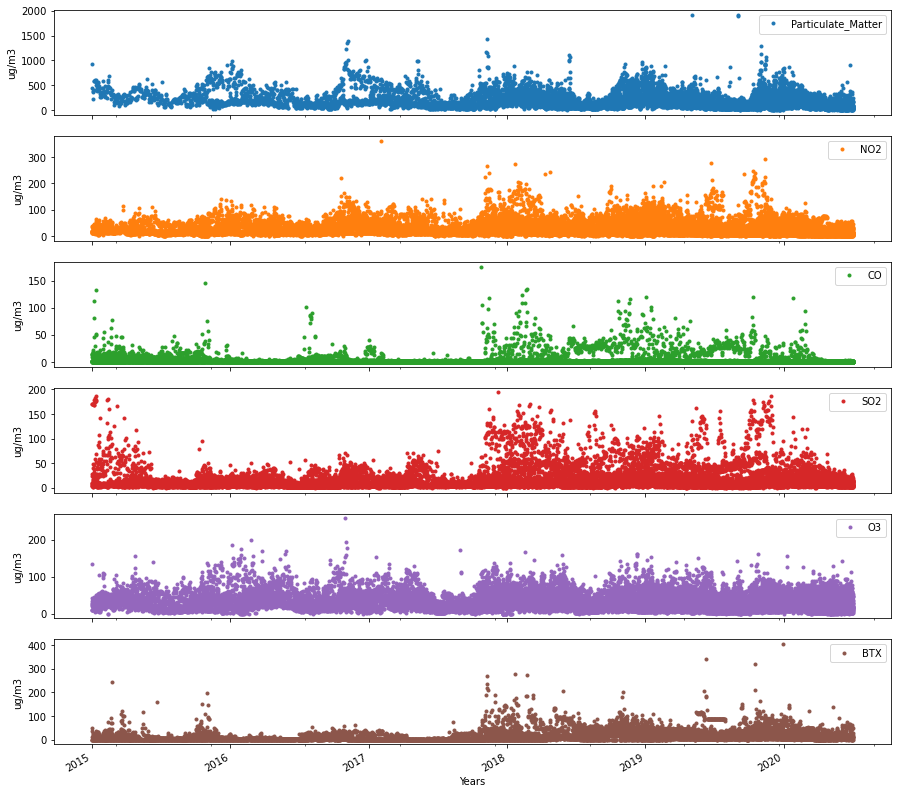

In [14]:
visualisePollutants(updatedCityData, newColumns)

## b. Visualising the amount of pollutants in air over the years and months

In [15]:
def trend_plot(updatedCityData, value):
    data = updatedCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])
    
    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()

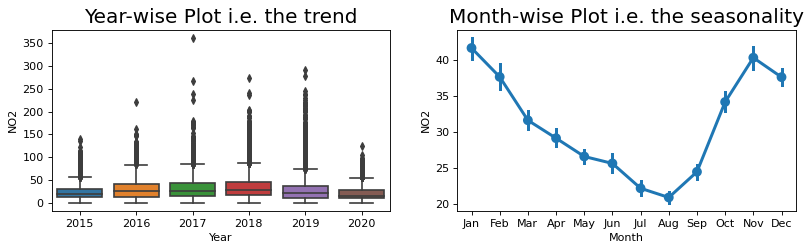

In [16]:
value='NO2'
trend_plot(updatedCityData,value)

## c. Visualising AQI over the years 

### Calculation of AQI

1. The AQI calculation uses 7 measures: PM2.5(Particulate Matter 2.5-micrometer), PM10, SO2, NOx, NH3, CO and O3(ozone).

2. For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

3. For CO and O3 the maximum value in last 8-hrs is used.

4. Each measure is converted into a Sub-Index based on pre-defined groups.

5. Sometimes measures are not available due to lack of measuring or lack of required data points.

6. Final AQI is the maximum Sub-Index with the condition that at least one of PM2 and PM10 should be available and at least three out of the seven should be available.

### How is AQI calculated?
1. The Sub-indices for individual pollutants at a monitoring location are calculated using its
24-hourly average concentration value (8-hourly in case of CO and O3) and health
breakpoint concentration range. The worst sub-index is the AQI for that location.
2. All the eight pollutants may not be monitored at all the locations. Overall AQI is
calculated only if data are available for minimum three pollutants out of which one should
necessarily be either PM2.5 or PM10. Else, data are considered insufficient for calculating
AQI. Similarly, a minimum of 16 hours’ data is considered necessary for calculating subindex.
3. The sub-indices for monitored pollutants are calculated and disseminated, even if data are
inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air
quality status for that pollutant.
4. The web-based system is designed to provide AQI on real time basis. It is an automated
system that captures data from continuous monitoring stations without human
intervention, and displays AQI based on running average values (e.g. AQI at 6am on a
day will incorporate data from 6am on previous day to the current day).
5. For manual monitoring stations, an AQI calculator is developed wherein data can be fed
manually to get AQI value. 

Let us take a look at the ranges of AQI.

<img src="https://i.imgur.com/XmnE0rT.png" alt="">



In [17]:
def visualiseAQI(udata, columns):
    data = udata.copy()
    data.set_index('Date',inplace=True)
            
    axes = data[columns].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')

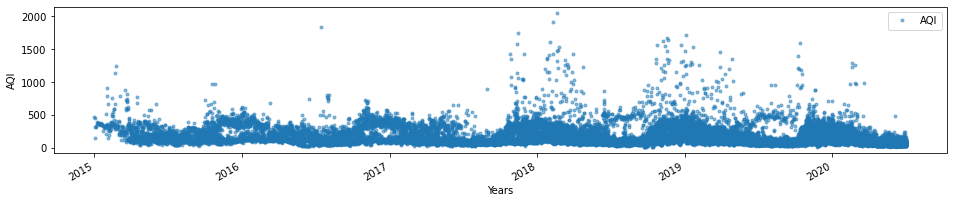

In [18]:
visualiseAQI(updatedCityData, ['AQI'])

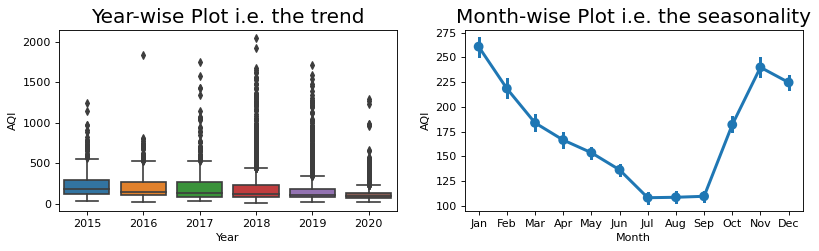

In [19]:
value='AQI'
trend_plot(updatedCityData,value)

# 3. Cities and Pollution

## a. Most Polluted cities

In [20]:
def max_polluted_city(pollutant, data):
    x1 = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='coolwarm')

In [21]:
pm = max_polluted_city('Particulate_Matter', updatedCityData)
no2 = max_polluted_city('NO2', updatedCityData)
so2 = max_polluted_city('SO2', updatedCityData)
co = max_polluted_city('CO', updatedCityData)
btx = max_polluted_city('BTX', updatedCityData)
o3 = max_polluted_city('O3', updatedCityData)

In [22]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [23]:
display_side_by_side(pm,no2,so2,co,btx, o3)

,City,Particulate_Matter
0,Delhi,352.480000
1,Gurugram,289.980000
2,Talcher,233.790000
3,Jorapokhar,198.450000
4,Patna,192.580000
5,Brajrajnagar,189.680000
6,Kolkata,179.990000
7,Guwahati,179.890000
8,Jaipur,178.000000
9,Amritsar,173.950000


## b. AQI of some cities

In [24]:
cities = ['Ahmedabad','Delhi','Mumbai','Kolkata','Hyderabad','Chennai']
filtered_city_day = updatedCityData[updatedCityData['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [25]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

Text(0, 0.5, 'AQI')

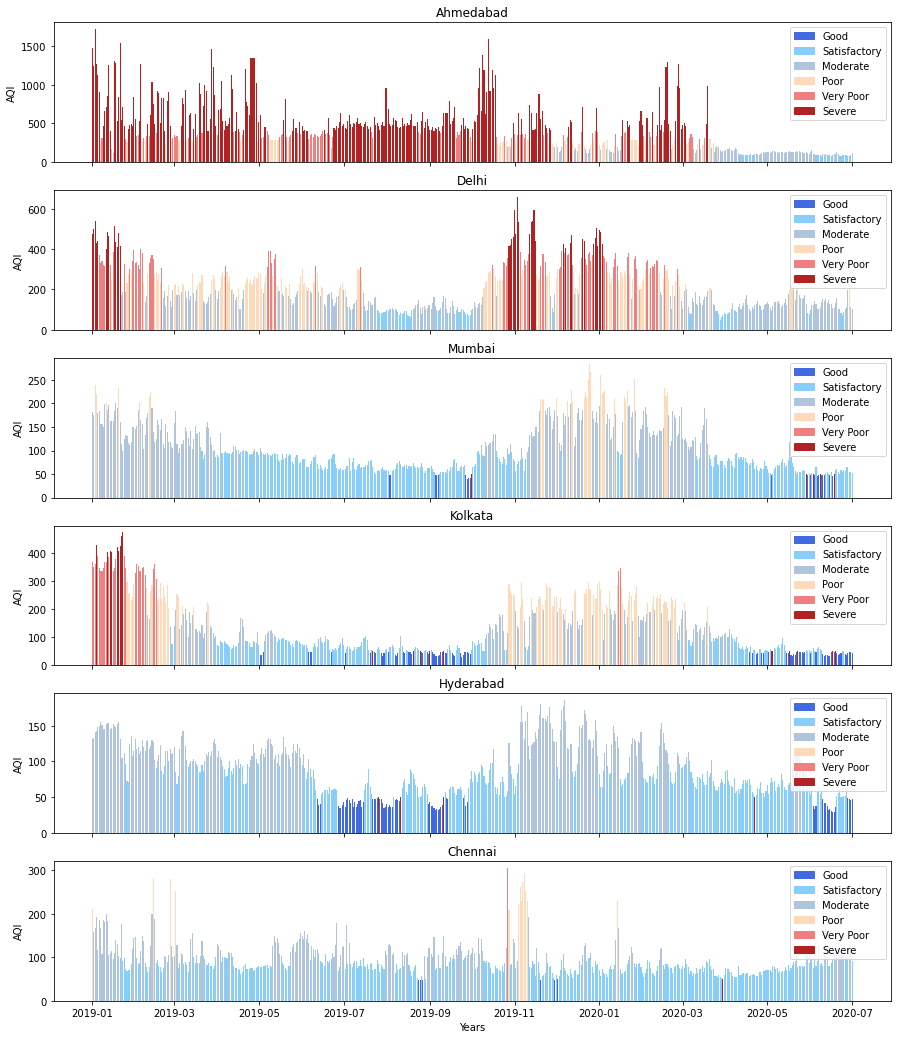

In [26]:
def getColorBar(city):
    col = []
    for val in AQI_pivot[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col


ah = getColorBar('Ahmedabad')
de = getColorBar('Delhi')
mu = getColorBar('Mumbai')
ko = getColorBar('Kolkata')
hy = getColorBar('Hyderabad')
ch = getColorBar('Chennai')

colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        
f, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(6, 1, sharex='col', sharey='row', figsize=(15,18))
ax1.bar(AQI_pivot.index, AQI_pivot['Ahmedabad'], color = ah, width = 0.75)
ax2.bar(AQI_pivot.index, AQI_pivot['Delhi'], color = de, width = 0.75)
ax3.bar(AQI_pivot.index, AQI_pivot['Mumbai'], color = mu, width = 0.75)
ax4.bar(AQI_pivot.index, AQI_pivot['Kolkata'], color = ko, width = 0.75)
ax5.bar(AQI_pivot.index, AQI_pivot['Hyderabad'], color = hy, width = 0.75)
ax6.bar(AQI_pivot.index, AQI_pivot['Chennai'], color = ch, width = 0.75)

ax1.legend(handles, labels, loc='upper right')
ax2.legend(handles, labels, loc='upper right')
ax3.legend(handles, labels, loc='upper right')
ax4.legend(handles, labels, loc='upper right')
ax5.legend(handles, labels, loc='upper right')
ax6.legend(handles, labels, loc='upper right')

ax1.title.set_text('Ahmedabad')
ax2.title.set_text('Delhi')
ax3.title.set_text('Mumbai')
ax4.title.set_text('Kolkata')
ax5.title.set_text('Hyderabad')
ax6.title.set_text('Chennai')

ax1.set_ylabel('AQI')
ax2.set_ylabel('AQI')
ax3.set_ylabel('AQI')
ax4.set_ylabel('AQI')
ax5.set_ylabel('AQI')
ax6.set_xlabel('Years')
ax6.set_ylabel('AQI')

# 4. Effect of Lockdown on AQI


## a. AQI in the year 2020 - City-wise

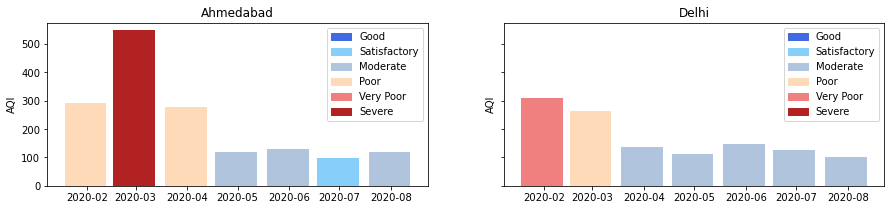

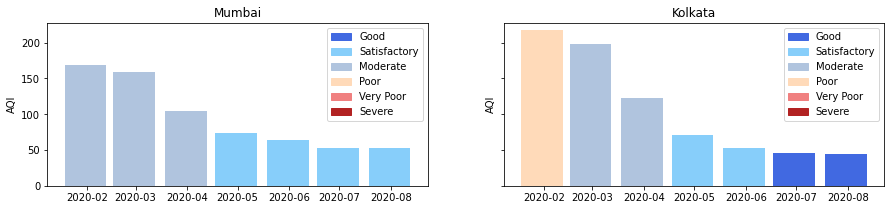

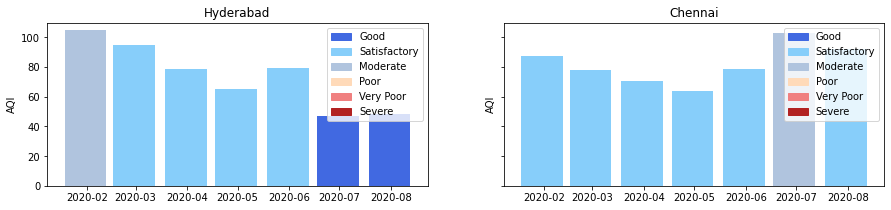

In [27]:
AQI_2020 = AQI_pivot[AQI_pivot.index > '2019-12-31']
AQI_2020 = AQI_2020.resample('M').mean()
# AQI_2020.set_index('Date')
# aqi = aqi.to_numpy()

def getColorBar(city):
    col = []
    for val in AQI_2020[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        else:
            col.append('firebrick')
    return col

for i in range(0, 6, 2):
    city_1 = cities[i]
    city_2 = cities[i+1]
    fig, ((ax1, ax2)) =  plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,3))
#     ax = fig.add_axes([0,0,1,1])
    ax1.bar(AQI_2020.index, AQI_2020[city_1], width = 25, color=getColorBar(city_1))
    ax1.title.set_text(city_1)
    ax1.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax1.legend(handles, labels, loc='upper right')
    
    ax2.bar(AQI_2020.index, AQI_2020[city_2], width = 25, color=getColorBar(city_2))
    ax2.title.set_text(city_2)
    ax2.set_ylabel('AQI')
    
    colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    ax2.legend(handles, labels, loc='upper right')
    
    
    

## b. AQI before and after Lockdown

It'll be also interesting to see tha difference in AQI before and after the Lockdown.

> ** 📌 Points to note :** 
> * The black line shows the AQI.
> * The coloured rectangles represent the different ranges of AQI.
> * Apparantely, all the six Indian cities seem to be a dangerously high level of pollution levels.
> * Clearly, there appears to be a rapid decline after 25th March,2020 in all the cities under sonsideration.

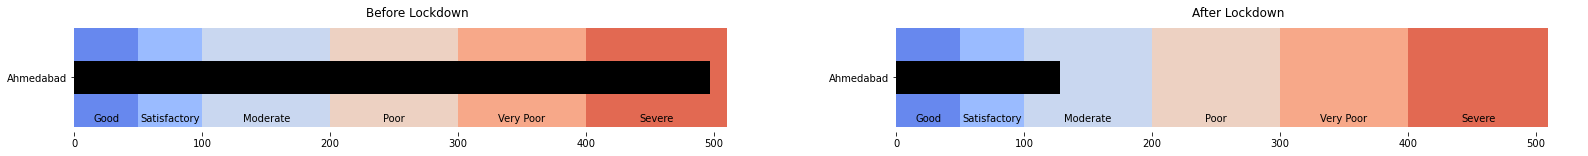

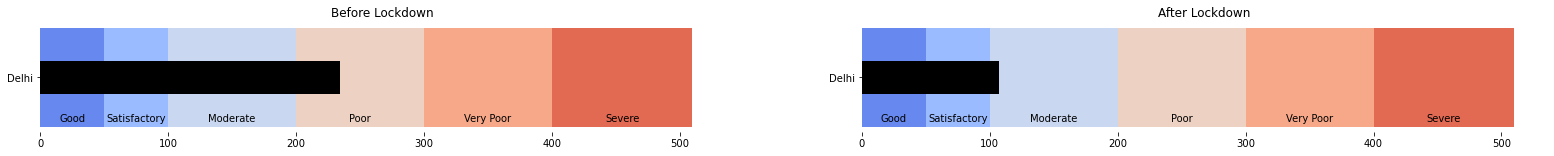

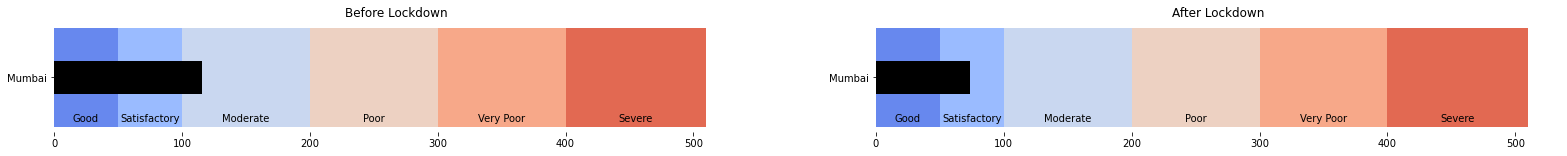

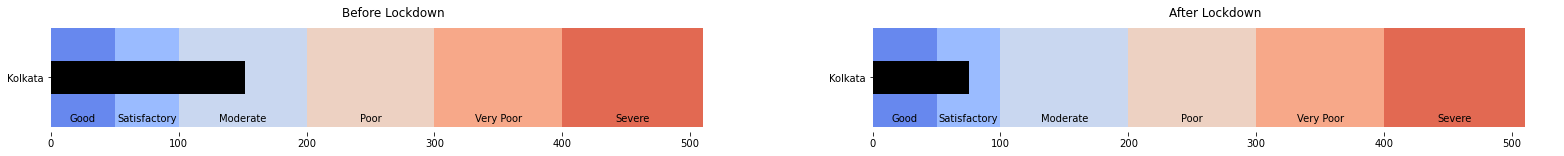

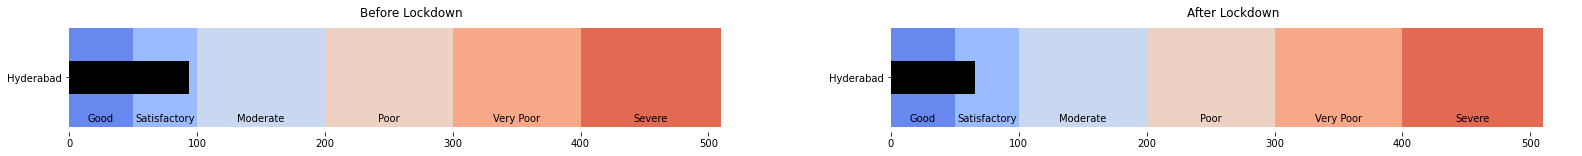

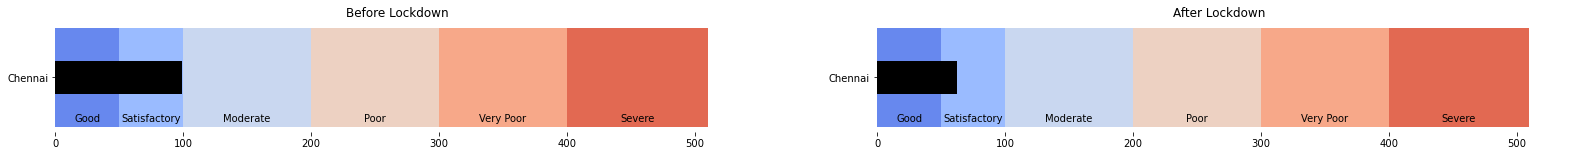

In [28]:
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
limits = [50, 100, 200, 300, 400, 510]
# palette = sns.light_palette("Spectral", len(limits), reverse = True)
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 2))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)
    
    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)
    
    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')
    
    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')

# Preprocessing

In [29]:
#formating Date
print(updatedCityData.columns)
updatedCityData['Date'] = pd.to_datetime(updatedCityData['Date'])

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'Particulate_Matter', 'NO2', 'CO',
       'SO2', 'O3', 'BTX'],
      dtype='object')


In [30]:
# updatedCityData.reset_index()
updatedCityData = updatedCityData[['City','Date','AQI','AQI_Bucket']]

In [31]:
updatedCityData.head()

,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN


### Handling Missing Values 

Filling Missing Values in Database with most frequent values

In [32]:
updatedCityData = updatedCityData.dropna()

updatedCityData

,City,Date,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,209.0,Poor
29,Ahmedabad,2015-01-30,328.0,Very Poor
30,Ahmedabad,2015-01-31,514.0,Severe
31,Ahmedabad,2015-02-01,782.0,Severe
32,Ahmedabad,2015-02-02,914.0,Severe
...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0,Good
29527,Visakhapatnam,2020-06-28,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,54.0,Satisfactory


### Changing data structure to City-wise Monthly data

In [33]:
#using cities for Comparision
cities=pd.unique(updatedCityData['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]
updatedCityData.columns
# cities

Index(['City', 'Date', 'AQI', 'AQI_Bucket'], dtype='object')

In [34]:
#Converting to Monthly data for easier usage
final_data= pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'), columns=column1)
for city,i in zip(cities, final_data.columns):
    n = len(np.array(updatedCityData[updatedCityData['City'] == city]['AQI']))
    final_data[i][-n:] = np.array(updatedCityData[updatedCityData['City']==city]['AQI'])

final_data=final_data.astype('float64')
final_data=final_data.resample(rule='MS').mean()

In [35]:
final_data.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2020-03-01,344.645161,66.105263,52.548387,95.387097,90.741935,122.709677,152.354839,57.096774,70.290323,85.225806,...,170.774194,126.806452,122.838710,134.000000,104.645161,158.419355,89.548387,173.096774,74.741935,86.774194
2020-04-01,121.900000,40.300000,44.400000,59.866667,68.533333,108.400000,140.666667,44.233333,63.500000,82.600000,...,121.400000,82.200000,70.366667,106.733333,74.333333,131.166667,69.933333,126.466667,57.066667,55.800000
2020-05-01,129.774194,24.193548,59.096774,77.677419,73.161290,104.451613,144.161290,74.129032,78.677419,57.935484,...,135.580645,82.709677,53.161290,119.096774,63.935484,138.516129,35.354839,118.870968,55.967742,64.903226
2020-06-01,98.066667,20.800000,47.866667,101.533333,55.166667,71.666667,113.033333,66.500000,103.066667,39.366667,...,136.533333,93.866667,46.466667,96.500000,53.300000,82.366667,31.933333,83.400000,45.400000,82.200000
2020-07-01,119.000000,20.000000,54.000000,78.000000,43.000000,69.000000,76.000000,66.000000,92.000000,33.000000,...,86.000000,102.000000,45.000000,76.000000,53.000000,98.000000,24.000000,101.000000,41.000000,50.000000


### Observing Data for a particular city

In [36]:
#use any City AQI instead to Predict Models for that City
# final_data['Delhi_AQI'] = final_data.mean(axis=1)
a = final_data['Delhi_AQI']
a.tail()

2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: Delhi_AQI, dtype: float64

### Observing Data for a particular year

In [37]:
#Obesrving the data for Last Year
data_2019 = final_data['2019-01-01':'2019-12-31']
data_2019

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2019-01-01,751.645161,NaN,116.129032,119.354839,116.806452,NaN,83.580645,NaN,131.000000,NaN,...,188.000000,NaN,360.838710,315.516129,165.516129,428.483871,NaN,66.032258,132.258065,173.129032
2019-02-01,613.285714,NaN,180.035714,94.178571,106.250000,NaN,82.142857,NaN,118.071429,NaN,...,315.785714,NaN,266.071429,243.071429,149.821429,308.642857,NaN,221.928571,108.892857,266.571429
2019-03-01,546.354839,NaN,209.677419,89.967742,122.129032,NaN,196.258065,NaN,101.419355,NaN,...,382.838710,NaN,157.774194,217.645161,123.483871,222.774194,NaN,319.258065,90.548387,140.580645
2019-04-01,643.900000,NaN,104.033333,109.900000,124.300000,NaN,236.066667,NaN,87.533333,NaN,...,263.933333,NaN,86.800000,217.700000,98.066667,153.466667,NaN,291.033333,76.033333,97.866667
2019-05-01,544.967742,NaN,82.225806,121.645161,105.387097,NaN,233.709677,NaN,103.612903,NaN,...,166.483871,NaN,88.548387,184.096774,87.870968,169.709677,NaN,298.064516,76.870968,96.258065
2019-06-01,394.566667,NaN,86.066667,105.833333,70.533333,NaN,172.566667,NaN,112.666667,NaN,...,132.833333,NaN,71.633333,167.700000,72.000000,148.366667,NaN,174.200000,57.200000,120.033333
2019-07-01,468.709677,NaN,97.580645,85.064516,63.741935,NaN,190.000000,NaN,88.709677,67.875000,...,130.000000,NaN,61.935484,94.419355,65.451613,99.000000,NaN,126.322581,53.967742,105.741935
2019-08-01,507.322581,NaN,57.322581,54.354839,59.354839,NaN,129.645161,NaN,85.548387,65.000000,...,112.612903,NaN,54.064516,90.322581,63.709677,107.193548,NaN,108.225806,54.838710,87.032258
2019-09-01,480.366667,NaN,45.133333,77.666667,72.966667,80.666667,98.466667,86.708333,103.633333,76.433333,...,110.166667,NaN,46.366667,76.633333,58.066667,113.366667,NaN,96.733333,60.033333,95.000000
2019-10-01,649.870968,NaN,54.161290,97.161290,81.129032,113.129032,95.322581,133.322581,102.903226,87.451613,...,83.774194,NaN,125.516129,205.387097,94.741935,192.645161,NaN,93.354839,63.451613,82.064516


### Observing data for a particular city and year

In [38]:
data_2019 = data_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI','Coimbatore_AQI','Chandigarh_AQI','Bhopal_AQI','Amaravati_AQI'],axis=1)
data_2019

,Ahmedabad_AQI,Amritsar_AQI,Bengaluru_AQI,Brajrajnagar_AQI,Chennai_AQI,Delhi_AQI,Gurugram_AQI,Guwahati_AQI,Hyderabad_AQI,Jaipur_AQI,Jorapokhar_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
2019-01-01,751.645161,119.354839,116.806452,83.580645,131.000000,365.741935,296.387097,NaN,133.290323,150.290323,188.000000,360.838710,315.516129,165.516129,428.483871,NaN,66.032258,132.258065,173.129032
2019-02-01,613.285714,94.178571,106.250000,82.142857,118.071429,258.178571,191.750000,132.833333,113.250000,118.714286,315.785714,266.071429,243.071429,149.821429,308.642857,NaN,221.928571,108.892857,266.571429
2019-03-01,546.354839,89.967742,122.129032,196.258065,101.419355,197.354839,147.580645,223.225806,106.161290,106.774194,382.838710,157.774194,217.645161,123.483871,222.774194,NaN,319.258065,90.548387,140.580645
2019-04-01,643.900000,109.900000,124.300000,236.066667,87.533333,219.400000,210.466667,123.500000,94.800000,151.000000,263.933333,86.800000,217.700000,98.066667,153.466667,NaN,291.033333,76.033333,97.866667
2019-05-01,544.967742,121.645161,105.387097,233.709677,103.612903,235.838710,219.064516,112.741935,113.419355,142.161290,166.483871,88.548387,184.096774,87.870968,169.709677,NaN,298.064516,76.870968,96.258065
2019-06-01,394.566667,105.833333,70.533333,172.566667,112.666667,197.766667,204.033333,60.600000,64.666667,119.966667,132.833333,71.633333,167.700000,72.000000,148.366667,NaN,174.200000,57.200000,120.033333
2019-07-01,468.709677,85.064516,63.741935,190.000000,88.709677,145.096774,114.096774,70.709677,48.096774,84.806452,130.000000,61.935484,94.419355,65.451613,99.000000,NaN,126.322581,53.967742,105.741935
2019-08-01,507.322581,54.354839,59.354839,129.645161,85.548387,99.290323,66.193548,122.193548,57.258065,65.838710,112.612903,54.064516,90.322581,63.709677,107.193548,NaN,108.225806,54.838710,87.032258
2019-09-01,480.366667,77.666667,72.966667,98.466667,103.633333,106.533333,88.566667,50.633333,49.966667,76.333333,110.166667,46.366667,76.633333,58.066667,113.366667,NaN,96.733333,60.033333,95.000000
2019-10-01,649.870968,97.161290,81.129032,95.322581,102.903226,251.000000,215.354839,97.322581,78.516129,137.806452,83.774194,125.516129,205.387097,94.741935,192.645161,NaN,93.354839,63.451613,82.064516


## Seasonal decomposition

2015-01-01    355.095238
2015-02-01    326.607143
2015-03-01    262.741935
2015-04-01    297.533333
2015-05-01    339.838710
                 ...    
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: Delhi_AQI, Length: 67, dtype: float64

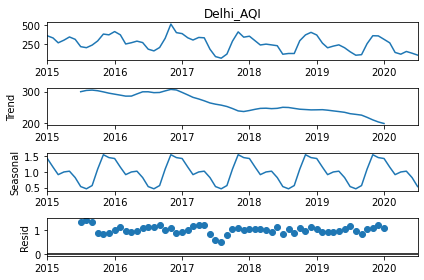

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI = final_data['Delhi_AQI']
result = seasonal_decompose(Delhi_AQI, model='multiplicative')
result.plot();
Delhi_AQI

In [41]:
# Forecasting: 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima; 
# print(np.__version__)
# print(np.__path__)
# print 

In [42]:
auto_arima(y=Delhi_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [43]:
#dividing into train and test:
train = Delhi_AQI[:41] #from 2015-2018
test = Delhi_AQI[42:54]# june-july 2019

In [44]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()

In [45]:
#predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

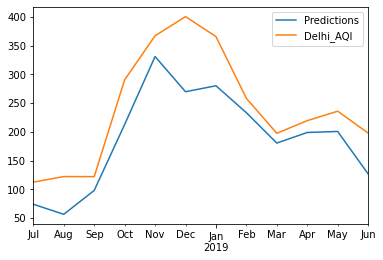

In [46]:
#Plotting predicted values with the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [47]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

Root Mean Squared Error:  61.76023565128281
Mean AQI: 240.71425371223765
Bias: 52.282227


C:\Users\Yashwant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


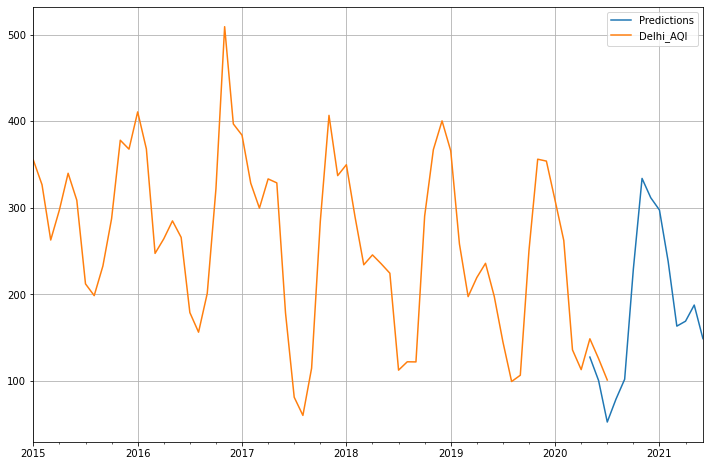

In [48]:
# Forming the model:
final_model = SARIMAX(Delhi_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results = final_model.fit()
# results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_AQI.plot(legend=True,figsize=(12,8),grid=True);

C:\Users\Yashwant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


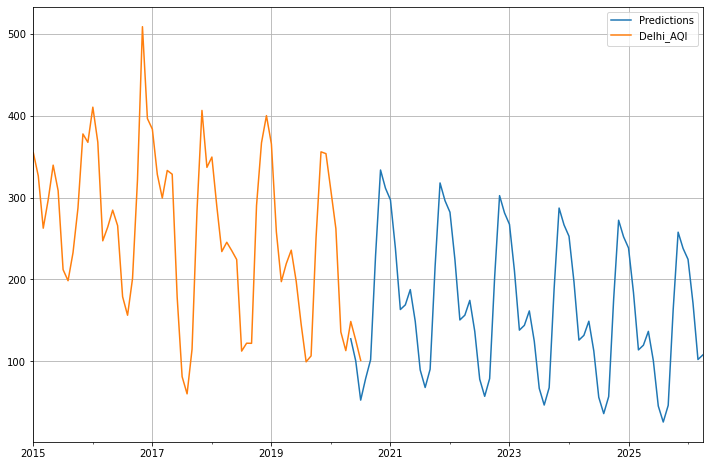

In [49]:
# Forming the model:
final_model = SARIMAX(Delhi_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results = final_model.fit()
# results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=135, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Delhi_AQI.plot(legend=True,figsize=(12,8),grid=True);

## Deep Leaning Model

In [50]:
Delhi_AQI=Delhi_AQI.reset_index()
Delhi_AQI.columns=['ds','y']
Delhi_AQI=Delhi_AQI.set_index('ds')
train=Delhi_AQI[:-24]
test=Delhi_AQI[-60:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Formatting the data:

In [51]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [52]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.65688527 0.59344271 0.45121586 0.52869578 0.62290921 0.55348954
 0.33835802 0.30818597 0.38438716 0.5061721  0.70789382 0.68497743
 0.78080962 0.6853936  0.41680535 0.45424025 0.50042504 0.45795189
 0.26458017 0.2140779  0.31394021 0.58296716 1.         0.74984734]
Predict this y: 
 [[0.7208247]]


In [53]:
### Creating the model:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# defining the model(note that  I am using a very basic model here, a 2 layer model only):
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### Fitting the model:


In [54]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=490)

Epoch 1/490
19/19 [==============================] - 9s 19ms/step - loss: 0.1983
Epoch 2/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0815
Epoch 3/490
19/19 [==============================] - 0s 15ms/step - loss: 0.0717
Epoch 4/490
19/19 [==============================] - 0s 12ms/step - loss: 0.0609
Epoch 5/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0533
Epoch 6/490
19/19 [==============================] - 0s 14ms/step - loss: 0.0514
Epoch 7/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0513
Epoch 8/490
19/19 [==============================] - 0s 20ms/step - loss: 0.0494
Epoch 9/490
19/19 [==============================] - 0s 14ms/step - loss: 0.0516
Epoch 10/490
19/19 [==============================] - 0s 16ms/step - loss: 0.0516
Epoch 11/490
19/19 [==============================] - 0s 14ms/step - loss: 0.0541
Epoch 12/490
19/19 [==============================] - 0s 14ms/step - loss: 0.0473
Epoch 13/490
19/19 [=====

19/19 [==============================] - 0s 19ms/step - loss: 0.0063
Epoch 102/490
19/19 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 103/490
19/19 [==============================] - 1s 27ms/step - loss: 0.0054
Epoch 104/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0067
Epoch 105/490
19/19 [==============================] - 1s 23ms/step - loss: 0.0075
Epoch 106/490
19/19 [==============================] - 0s 20ms/step - loss: 0.0052
Epoch 107/490
19/19 [==============================] - 1s 23ms/step - loss: 0.0062
Epoch 108/490
19/19 [==============================] - 0s 16ms/step - loss: 0.0053
Epoch 109/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0045
Epoch 110/490
19/19 [==============================] - 0s 23ms/step - loss: 0.0057
Epoch 111/490
19/19 [==============================] - 1s 24ms/step - loss: 0.0046
Epoch 112/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 113/490
19/1

19/19 [==============================] - 0s 13ms/step - loss: 0.0030
Epoch 200/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 201/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 202/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 203/490
19/19 [==============================] - 0s 21ms/step - loss: 0.0021
Epoch 204/490
19/19 [==============================] - 0s 17ms/step - loss: 0.0021
Epoch 205/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 206/490
19/19 [==============================] - 0s 21ms/step - loss: 0.0023
Epoch 207/490
19/19 [==============================] - 0s 20ms/step - loss: 0.0028
Epoch 208/490
19/19 [==============================] - 0s 22ms/step - loss: 0.0024
Epoch 209/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 210/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0030
Epoch 211/490
19/1

19/19 [==============================] - 0s 14ms/step - loss: 9.4639e-04
Epoch 298/490
19/19 [==============================] - 0s 13ms/step - loss: 8.1413e-04
Epoch 299/490
19/19 [==============================] - 0s 13ms/step - loss: 7.9714e-04
Epoch 300/490
19/19 [==============================] - 0s 14ms/step - loss: 9.5392e-04
Epoch 301/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 302/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0017
Epoch 303/490
19/19 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 304/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 305/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 306/490
19/19 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 307/490
19/19 [==============================] - 0s 19ms/step - loss: 0.0028
Epoch 308/490
19/19 [==============================] - 0s 17ms/step - loss: 0.0021
Ep

19/19 [==============================] - 0s 18ms/step - loss: 9.3701e-04
Epoch 394/490
19/19 [==============================] - 0s 18ms/step - loss: 0.0012
Epoch 395/490
19/19 [==============================] - 0s 18ms/step - loss: 8.5996e-04
Epoch 396/490
19/19 [==============================] - 0s 15ms/step - loss: 6.3938e-04
Epoch 397/490
19/19 [==============================] - 0s 13ms/step - loss: 6.0902e-04
Epoch 398/490
19/19 [==============================] - 0s 13ms/step - loss: 7.8107e-04
Epoch 399/490
19/19 [==============================] - 0s 13ms/step - loss: 5.6292e-04
Epoch 400/490
19/19 [==============================] - 0s 13ms/step - loss: 7.3699e-04
Epoch 401/490
19/19 [==============================] - 0s 13ms/step - loss: 3.3674e-04
Epoch 402/490
19/19 [==============================] - 0s 14ms/step - loss: 5.9334e-04
Epoch 403/490
19/19 [==============================] - 0s 14ms/step - loss: 5.0347e-04
Epoch 404/490
19/19 [==============================] - 0s 13m

19/19 [==============================] - 0s 19ms/step - loss: 0.0040
Epoch 488/490
19/19 [==============================] - 0s 17ms/step - loss: 0.0041
Epoch 489/490
19/19 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 490/490
19/19 [==============================] - 0s 21ms/step - loss: 6.1202e-04


1/1 [==============================] - 0s 66ms/step


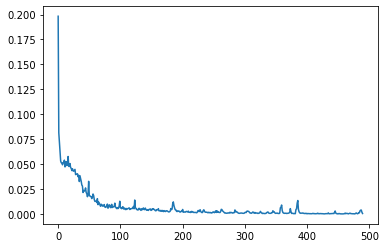

In [55]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

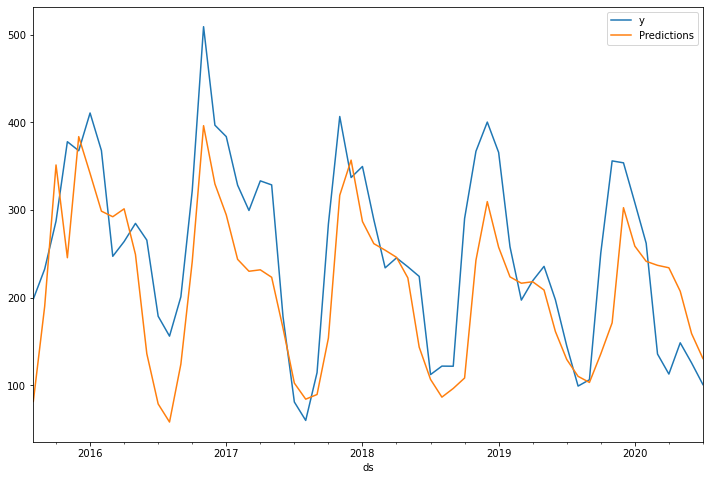

In [56]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [61]:
RMSE=np.sqrt(mean_squared_error(test['y'],test['Predictions']))
print('RMSE = ',RMSE)
print('Delhi_AQI=',Delhi_AQI['y'].mean())

RMSE =  76.97319785486414
Delhi_AQI= 257.9354517338621


### Forcasting Using Deep Learning

In [58]:
scaler.fit(Delhi_AQI)
scaled_City_AQI=scaler.transform(Delhi_AQI)
generator = TimeseriesGenerator(scaled_City_AQI, scaled_City_AQI, length=n_input, batch_size=1)
test_predictions = []

first_eval_batch = scaled_City_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 71ms/step


### Setting Ranges

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.flatten()
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2020-06-01',periods=60,freq='MS'))

### Plotting

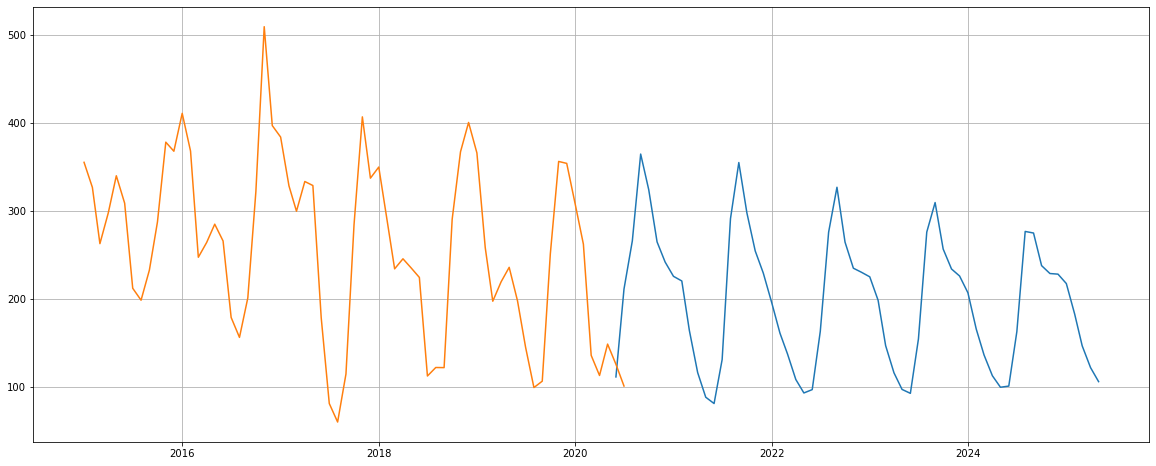

In [60]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( Delhi_AQI['y'])